In [1]:
#App Review Sentiment Analysis

In [2]:
#imports
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
#data loading..
data = pd.read_csv(r"C:\Users\Chethan\Downloads\archive\threads_reviews.csv")

In [4]:
#Step 1: Data Exploration
data.head()

,source,review_description,rating,review_date
0,Google Play,Very good app for Android phone and me,5,27-08-2023 10:31
1,Google Play,Sl👍👍👍👍,5,27-08-2023 10:28
2,Google Play,Best app,5,27-08-2023 9:47
3,Google Play,Gatiya app,1,27-08-2023 9:13
4,Google Play,Lit bruv,5,27-08-2023 9:00


In [5]:
#checking rows and columns
data.shape

(40435, 4)

In [6]:
#checking any missing values
data.isnull().sum().sort_values(ascending = False)

source                0
review_description    0
rating                0
review_date           0
dtype: int64

In [7]:
#checking info
data.info

<bound method DataFrame.info of             source                                 review_description  rating  \
0      Google Play             Very good app for Android phone and me       5   
1      Google Play                                             Sl👍👍👍👍       5   
2      Google Play                                           Best app       5   
3      Google Play                                         Gatiya app       1   
4      Google Play                                           Lit bruv       5   
...            ...                                                ...     ...   
40430    App Store  They don’t let you delete your account once yo...       1   
40431    App Store                               Twitter >>>> Threads       1   
40432    App Store  Really? Hard to believe. I’m not in Calif., bu...       1   
40433    App Store  While the app seems like a good start, it seem...       2   
40434    App Store  Been on it one day and it glitches and no one ...       1

In [8]:
#checking unique values in dataset
data.nunique()

source                    2
review_description    32894
rating                    5
review_date           16742
dtype: int64

In [9]:
#Step 2: Data Preparation:
# Convert review_date to datetime format
data['review_date'] = pd.to_datetime(data['review_date'], format='%d-%m-%Y %H:%M')

# Extract the various components
data['review_date_year'] = data['review_date'].dt.strftime('%Y')
data['review_date_month'] = data['review_date'].dt.strftime('%b')  # Corrected to '%b' for abbreviated month name
data['review_date_day'] = data['review_date'].dt.strftime('%-d')
data['review_date_dayweek_name'] = data['review_date'].dt.strftime('%a')
data['review_date_hour'] = data['review_date'].dt.strftime('%H')
data['review_date_daytime'] = data['review_date'].dt.strftime('%p')

data.head()


,source,review_description,rating,review_date,review_date_year,review_date_month,review_date_day,review_date_dayweek_name,review_date_hour,review_date_daytime
0,Google Play,Very good app for Android phone and me,5,2023-08-27 10:31:00,2023,Aug,2023-08-27 10:31:00,Sun,10,AM
1,Google Play,Sl👍👍👍👍,5,2023-08-27 10:28:00,2023,Aug,2023-08-27 10:28:00,Sun,10,AM
2,Google Play,Best app,5,2023-08-27 09:47:00,2023,Aug,2023-08-27 09:47:00,Sun,09,AM
3,Google Play,Gatiya app,1,2023-08-27 09:13:00,2023,Aug,2023-08-27 09:13:00,Sun,09,AM
4,Google Play,Lit bruv,5,2023-08-27 09:00:00,2023,Aug,2023-08-27 09:00:00,Sun,09,AM


In [10]:
data.describe(include='all')

,source,review_description,rating,review_date,review_date_year,review_date_month,review_date_day,review_date_dayweek_name,review_date_hour,review_date_daytime
count,40435,40435,40435.000000,40435,40435,40435,40435,40435,40435,40435
unique,2,32894,NaN,NaN,1,2,16742,7,24,2
top,Google Play,Good,NaN,NaN,2023,Jul,2023-07-06 16:43:00,Thu,16,PM
freq,36687,939,NaN,NaN,40435,37348,22,13551,2137,20219
mean,NaN,NaN,3.300532,2023-07-12 18:14:34.237170688,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,2023-07-05 22:53:00,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,1.000000,2023-07-06 18:35:00,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.000000,2023-07-08 02:03:00,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,2023-07-12 21:25:00,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,5.000000,2023-08-27 10:31:00,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data.dtypes

source                              object
review_description                  object
rating                               int64
review_date                 datetime64[ns]
review_date_year                    object
review_date_month                   object
review_date_day                     object
review_date_dayweek_name            object
review_date_hour                    object
review_date_daytime                 object
dtype: object

In [12]:
#Performing EDA:

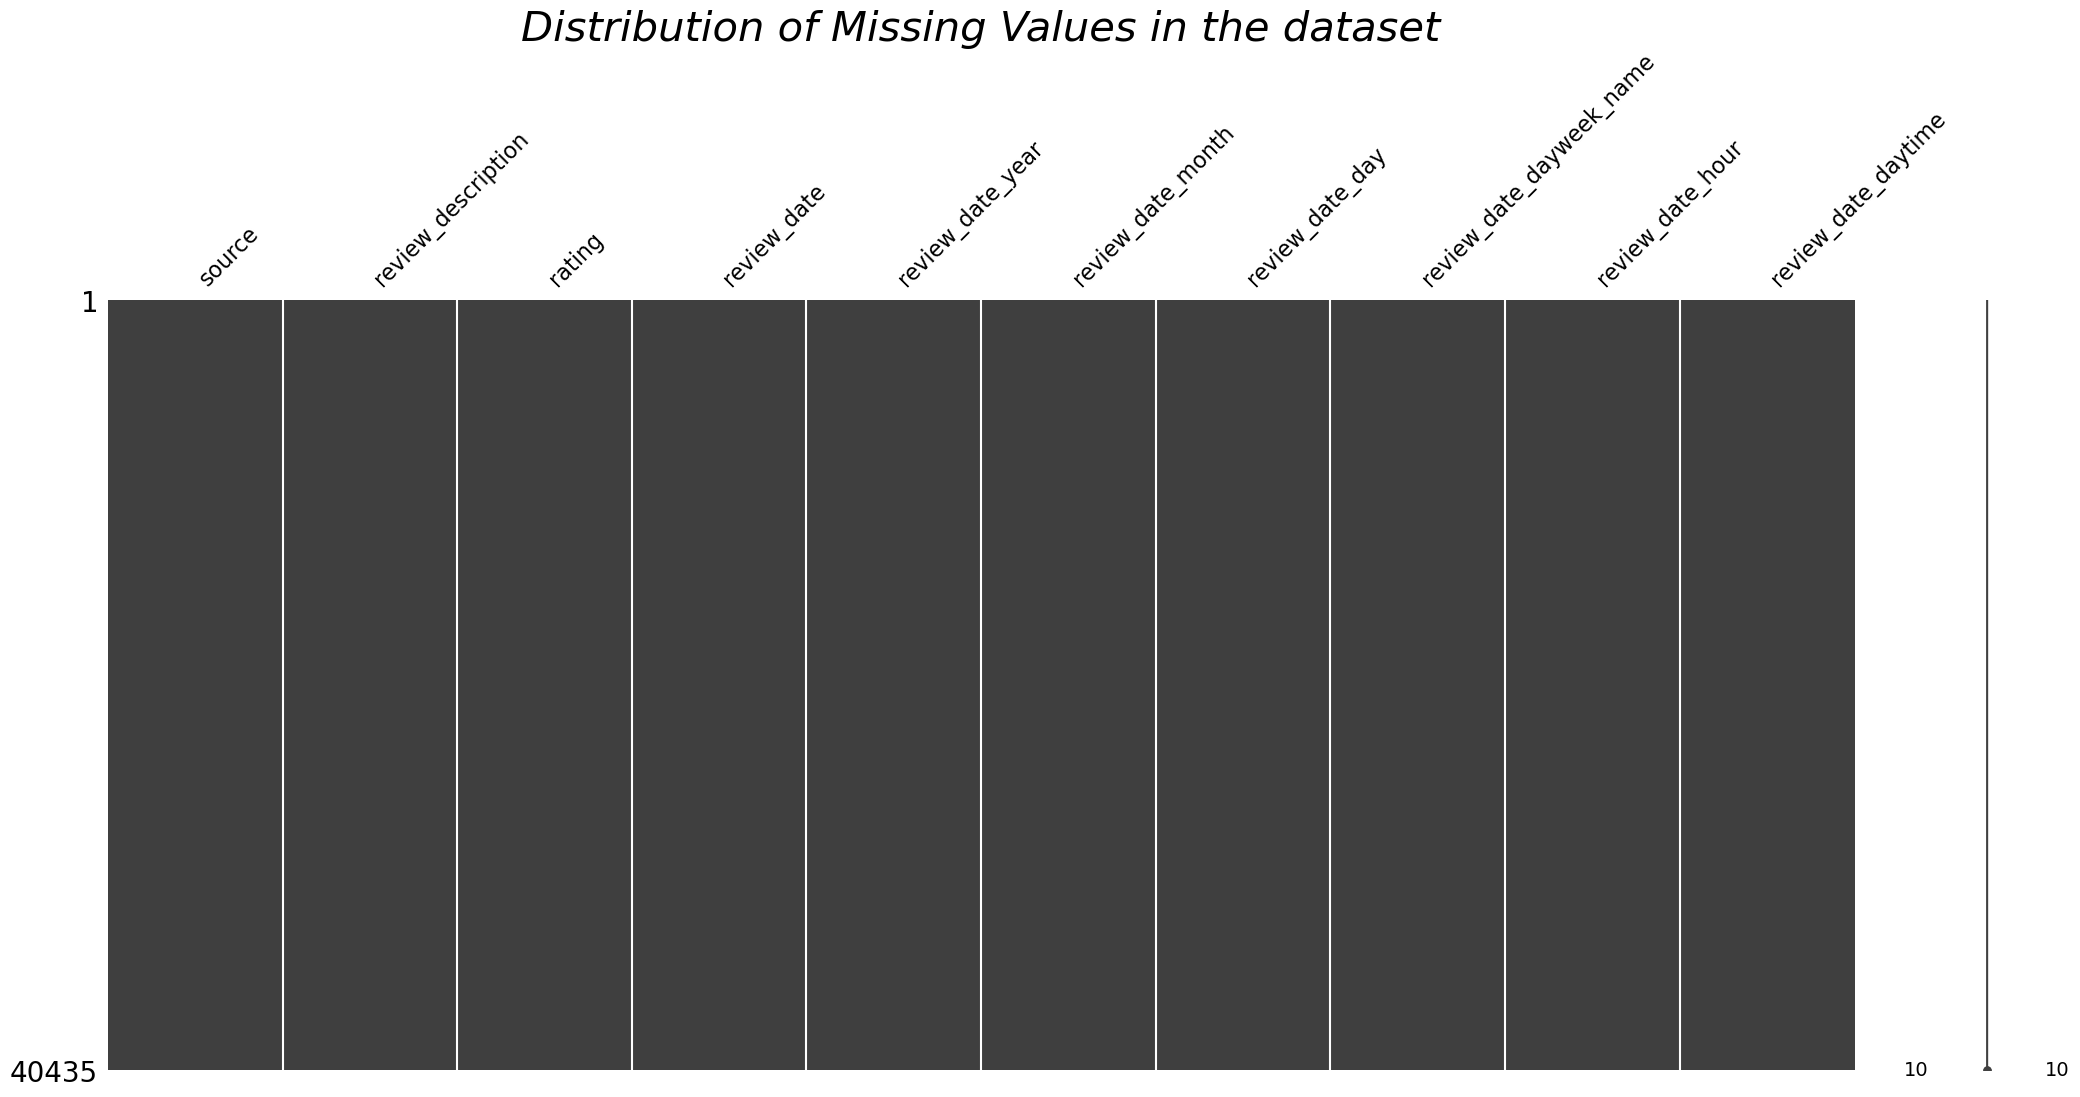

In [13]:
# Plot the missing values matrix
msno.matrix(data)
plt.title('Distribution of Missing Values in the dataset', fontsize=30, fontstyle='oblique')
plt.show()


In [14]:
data['rating'].value_counts()

rating
5    18253
1    12921
4     3786
3     3177
2     2298
Name: count, dtype: int64

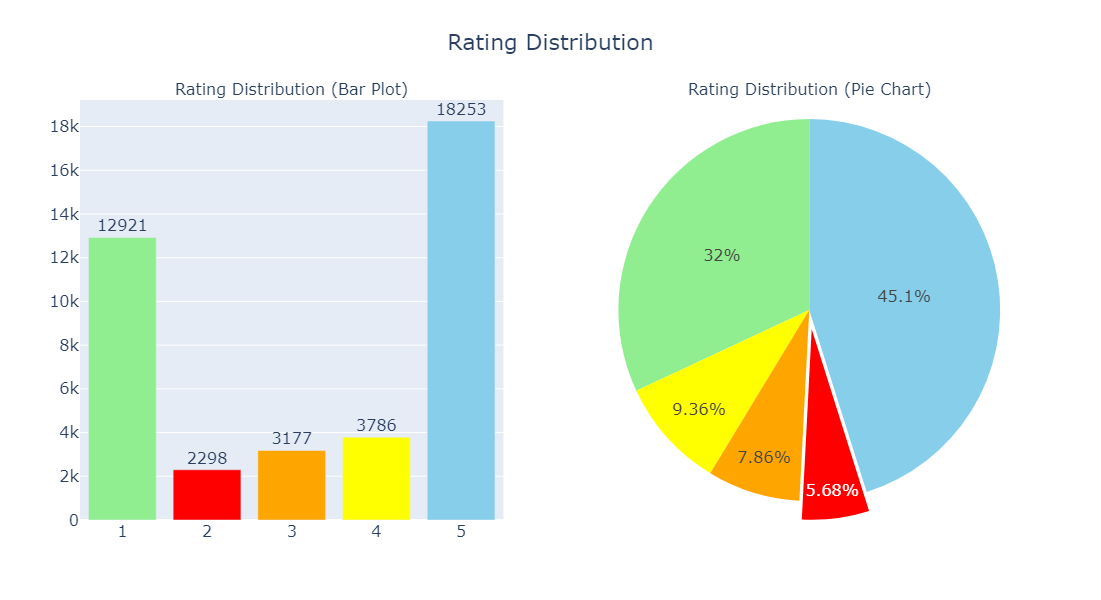

In [16]:
#Let's check Overall Rating Distribution:

rating_counts = data['rating'].value_counts()

# Creating subplots: 1 row, 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=('Rating Distribution (Bar Plot)', 'Rating Distribution (Pie Chart)'), specs=[[{"type": "xy"}, {"type": "domain"}]])

# Adding bar plot with text labels
fig.add_trace(go.Bar(x=rating_counts.index, y=rating_counts.values, marker_color=['skyblue', 'lightgreen', 'yellow', 'orange', 'red'],
                     text=rating_counts.values, textposition='outside'), row=1, col=1)

# Adding pie chart
fig.add_trace(go.Pie(labels=rating_counts.index, values=rating_counts.values, marker_colors=['skyblue', 'lightgreen', 'yellow', 'orange', 'red'], pull=[0, 0, 0, 0, 0.1]), row=1, col=2)

#overall layout controller
fig.update_layout(
    title='Rating Distribution',
    title_x=0.5,
    showlegend=False,
    width=1200,  
    height=600,  
    font=dict(size=16) 
)

fig.show()

In [17]:
data['source'].value_counts()

source
Google Play    36687
App Store       3748
Name: count, dtype: int64

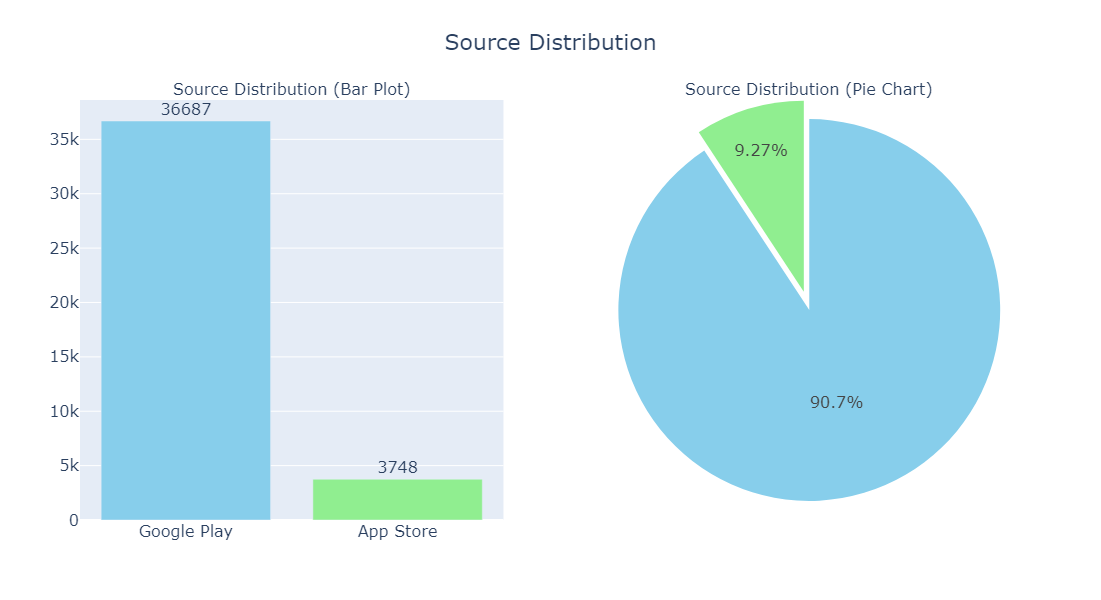

In [19]:
#Let's check for source distribution between Google Play and App Store in the dataset:

# Getting the counts of each source
source_counts = data['source'].value_counts()

# Creating subplots: 1 row, 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=('Source Distribution (Bar Plot)', 'Source Distribution (Pie Chart)'), specs=[[{"type": "xy"}, {"type": "domain"}]])

# Adding bar plot with text labels
fig.add_trace(go.Bar(x=source_counts.index, y=source_counts.values, marker_color=['skyblue', 'lightgreen'],
                     text=source_counts.values, textposition='outside'), row=1, col=1)

# Adding pie chart
fig.add_trace(go.Pie(labels=source_counts.index, values=source_counts.values, marker_colors=['skyblue', 'lightgreen'], pull=[0, 0.1]), row=1, col=2)

# Overall layout controller
fig.update_layout(
    title='Source Distribution',
    title_x=0.5,
    showlegend=False,
    width=1200,  
    height=600,  
    font=dict(size=16) 
)

fig.show()


In [ ]:
#pending EDA and further steps: